In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Contents

## Problem Statement

What does your gut say?

Colorectal cancer is one of the leading causes of cancer death in the US.[*source*](https://www.cancer.org/cancer/colon-rectal-cancer/detection-diagnosis-staging/detection.html) The complexity of the surgery and low quality of life can be prevented with early diagnosis by taking patient biopsies to pathologists. Therefore, more people are going for regular scopes and check-ups to detect the onset of the disease earlier. This increases the number of cases resulting in increase in workload and tighter schedule for doctors to work around with.

With slide scanning technology getting faster and more reliable, a larger volume of image data becomes available to train and validate various models. Therefore, classification of different tissue types can complement pathologists in making more accurate diagnosis within the tight schedule. 

Many a times, these pathologists are also involved with research work. Genetic expression data of patients can aid in research work to identify genes and make treatments more personalised.[*source*](https://www.nature.com/articles/s41374-020-00514-0) However, there are limitations to using gene expression and microarray data.[*source*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2855106/)

Thus, clinical text data could be used to classify genetic mutations based on clinical evidence via natural language processing for research work.  

Apart from diagnosis and research work, this machine learning models can be used for educational purposes for training-pathologists. Therefore, a website is created to classify images into their respective categories for educational or research purposes. 

https://treshapdesai.wixsite.com/website

## Background

## Data Used

## Data Dictionary

## Colorectal cancer dataset

In [3]:
# read colorectal cancer data set 
# dataset obtained from https://www.kaggle.com/kmader/colorectal-histology-mnist/

colorectal = pd.read_csv('../data/hmnist_64_64_L.csv')


In [4]:
# check first 5 rows of dataset

colorectal.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,134,99,119,130,142,169,152,139,117,87,...,112,89,73,100,120,120,126,140,195,2
1,55,64,74,63,74,75,71,73,70,77,...,79,85,86,77,68,66,65,68,69,2
2,114,116,136,152,132,100,151,150,127,205,...,128,157,159,205,182,143,129,89,122,2
3,86,82,88,85,103,93,98,109,104,115,...,79,80,109,128,89,85,80,63,48,2
4,168,143,140,139,129,123,123,141,137,101,...,231,199,183,195,179,134,142,158,149,2


In [5]:
# dataset information check

colorectal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 4097 entries, pixel0000 to label
dtypes: int64(4097)
memory usage: 156.3 MB


In [6]:
# check dataset unique values

colorectal.nunique()

pixel0000    236
pixel0001    238
pixel0002    241
pixel0003    239
pixel0004    238
            ... 
pixel4092    239
pixel4093    237
pixel4094    238
pixel4095    237
label          8
Length: 4097, dtype: int64

In [7]:
# check dataset missing values

colorectal.isnull().sum().sort_values(ascending=False)

label        0
pixel2047    0
pixel1373    0
pixel1372    0
pixel1371    0
            ..
pixel2725    0
pixel2724    0
pixel2723    0
pixel2722    0
pixel0000    0
Length: 4097, dtype: int64

There are no missing values. Therefore no columns or rows will be dropped.

In [8]:
# view dataset statistics

colorectal.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,137.412400,137.26200,137.523400,137.939400,137.292200,136.531000,136.712400,137.259200,137.394200,136.994600,...,136.855800,136.799000,136.995800,137.48780,136.815200,136.77380,136.866200,136.769000,136.847800,4.500000
std,74.241325,74.09328,74.141781,74.101279,74.298932,74.760707,74.649521,74.667226,74.918143,75.012463,...,74.420652,74.272306,74.308294,74.06259,74.085413,74.26376,74.310709,73.854691,73.835275,2.291517
min,13.000000,11.00000,10.000000,10.000000,9.000000,11.000000,12.000000,11.000000,10.000000,10.000000,...,10.000000,12.000000,9.000000,12.00000,11.000000,11.00000,11.000000,10.000000,12.000000,1.000000
25%,75.000000,74.00000,76.000000,76.000000,74.750000,73.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,73.750000,75.00000,75.000000,74.00000,74.000000,75.000000,75.000000,2.750000
50%,121.000000,122.00000,121.000000,121.000000,122.000000,120.000000,120.000000,120.000000,119.000000,119.000000,...,121.000000,122.000000,121.000000,122.00000,121.000000,121.00000,121.000000,121.000000,121.000000,4.500000
75%,222.000000,219.25000,220.000000,221.000000,221.000000,221.000000,221.000000,222.000000,223.000000,222.000000,...,220.000000,220.000000,221.000000,220.00000,218.250000,218.00000,218.250000,220.000000,219.250000,6.250000
max,248.000000,249.00000,252.000000,248.000000,250.000000,248.000000,250.000000,249.000000,251.000000,253.000000,...,253.000000,254.000000,252.000000,250.00000,249.000000,249.00000,249.000000,249.000000,250.000000,8.000000


In [9]:
# view datatypes

colorectal.dtypes

pixel0000    int64
pixel0001    int64
pixel0002    int64
pixel0003    int64
pixel0004    int64
             ...  
pixel4092    int64
pixel4093    int64
pixel4094    int64
pixel4095    int64
label        int64
Length: 4097, dtype: object

In [10]:
colorectal12 = colorectal.loc[colorectal['label'].isin(['1','2'])]

colorectal12.to_csv('../data/colorectal12.csv', index=False)

## Gene expression dataset

In [11]:
# gene expression data set for precision/personalized medicine
# https://www.kaggle.com/masudur/colon-cancer-gene-expression-data

geneexpression = pd.read_csv('../data/colon - labled.csv')
geneexpression.drop(columns = 'Unnamed: 0', inplace=True)

In [12]:
geneexpression.head()

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,...,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,...,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,...,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250,Abnormal


<AxesSubplot:ylabel='Class'>

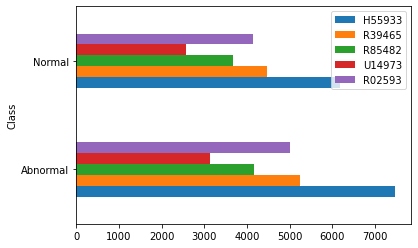

In [13]:
geneexpression.groupby('Class').mean()[['H55933', 'R39465', 'R85482','U14973','R02593']].plot(kind = 'barh')

In [14]:
# statistical test for all columns 
# does gene expression play a role in causing cancer
# probably some, which ones
# is it realistic to do gene expression for all patients, limitations citing

## Clinical text dataset

In [15]:
# read training and test, text and varinats data

training_text = pd. read_csv("../data/training_text.txt", engine='python',sep='\|\|',skiprows=1, names=["ID", "Text"]).set_index('ID')
test_text = pd. read_csv("../data/test_text.txt", engine='python',sep='\|\|',skiprows=1, names=["ID", "Text"]).set_index('ID')
train_variants = pd. read_csv("../data/training_variants.txt").set_index('ID')
test_variants = pd. read_csv("../data/test_variants.txt").set_index('ID')

In [16]:
training_text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [17]:
train_variants.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [18]:
# merge the training and test dataframes together on 'ID'

train = pd.merge(training_text, train_variants, how='inner', on='ID')
test = pd.merge(test_text, test_variants, how='inner', on='ID')


In [19]:
# see first 5 rows of train set

train.head()

,Text,Gene,Variation,Class
ID,,,,
0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [20]:
# check for null values

train.isnull().sum().sort_values(ascending=False)


Text         5
Class        0
Variation    0
Gene         0
dtype: int64

In [21]:
# check null values

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3316 non-null   object
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 129.7+ KB


In [22]:
# drop nulls in train set

train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3316 non-null   object
 1   Gene       3316 non-null   object
 2   Variation  3316 non-null   object
 3   Class      3316 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 129.5+ KB


In [23]:
# unique genes

train['Gene'].unique().tolist()

['FAM58A',
 'CBL',
 'SHOC2',
 'TERT',
 'DICER1',
 'PTPRT',
 'RHEB',
 'SHQ1',
 'CCND2',
 'RAD50',
 'CCND3',
 'RIT1',
 'CCNE1',
 'RYBP',
 'TGFBR1',
 'TGFBR2',
 'MSH6',
 'KMT2D',
 'LATS1',
 'PBRM1',
 'SF3B1',
 'LATS2',
 'EGFR',
 'NKX2-1',
 'EIF1AX',
 'ARID2',
 'BRD4',
 'HIST1H1C',
 'ERRFI1',
 'CHEK2',
 'PAK1',
 'TMPRSS2',
 'H3F3A',
 'ELF3',
 'ROS1',
 'ASXL2',
 'CDH1',
 'EPCAM',
 'EP300',
 'EPAS1',
 'TP53',
 'TP53BP1',
 'SMAD2',
 'SMAD3',
 'SMAD4',
 'CDK4',
 'AURKB',
 'CDK6',
 'FBXW7',
 'CDK8',
 'CDKN1A',
 'CDKN1B',
 'CDKN2A',
 'CDKN2B',
 'CDKN2C',
 'ASXL1',
 'ERBB2',
 'ERBB3',
 'ERBB4',
 'ERCC2',
 'BRIP1',
 'ERCC3',
 'ERCC4',
 'ABL1',
 'CEBPA',
 'ERG',
 'HLA-A',
 'HLA-B',
 'PDGFRA',
 'PDGFRB',
 'RBM10',
 'KDM5C',
 'ESR1',
 'ETV1',
 'ETV6',
 'TSC1',
 'IKZF1',
 'TSC2',
 'EWSR1',
 'ACVR1',
 'FOXA1',
 'MDM2',
 'ARID1A',
 'EZH2',
 'MDM4',
 'KLF4',
 'RXRA',
 'MAP3K1',
 'AXIN1',
 'BAP1',
 'MEN1',
 'FANCA',
 'FANCC',
 'MET',
 'U2AF1',
 'KMT2C',
 'FAT1',
 'ARID1B',
 'PIK3CA',
 'PIK3CB',
 'PIM1',
 

In [24]:
# number of unique genes

train['Gene'].nunique()

262

In [25]:
# convert to lower case

train['Text'] = train['Text'].str.lower()

In [26]:
# remove digits

train['Text'] = train['Text'].replace('\d+', '', regex = True)

In [27]:
# only letters or words

train['Text'] = train['Text'].replace('[^\w\s\+]', '', regex = True)

In [28]:
train.to_csv('../data/train_nlp.csv')

In [29]:
# number of text rows with colorectal cancer data

train['Text'].str.contains('colorectal').sum()

921

In [30]:
# view data specific for colorectal cancer

train_colorectal = train[train['Text'].str.contains('colorectal')]
train_colorectal


,Text,Gene,Variation,Class
ID,,,,
28,sequencing studies have identified many recurr...,TERT,C228T,7
31,sequencing studies have identified many recurr...,TERT,Promoter Mutations,7
33,the current world health organization classifi...,TERT,Amplification,2
34,sequencing studies have identified many recurr...,TERT,C250T,7
35,abstract dicer plays a critical role in micr...,DICER1,G1809R,4
...,...,...,...,...
3256,neuroblastoma the most common paediatric solid...,CASP8,Promoter Hypermethylation,4
3262,ret is a singlepass transmembrane receptor tyr...,RET,S891A,7
3269,oncogenic fusion of the ret rearranged during ...,RET,Fusions,2


[]

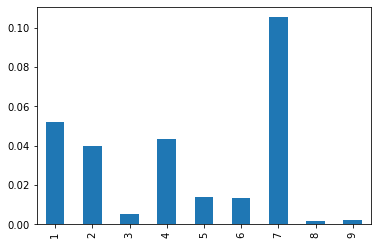

In [74]:
(train_colorectal['Class'].value_counts(sort=False) / train.shape[0]).plot(kind='bar')
plt.plot()

In [31]:
cd117 = train[train['Gene'].str.contains('VEGF')]
cd117

,Text,Gene,Variation,Class
ID,,,,
1578,death rates from hepatocellular carcinoma hcc ...,VEGFA,Amplification,7


In [32]:
# check number of class remaining for data specific to colorectal cancer data

train_colorectal['Class'].unique().tolist()

[7, 2, 4, 1, 5, 8, 9, 6, 3]

In [71]:
#train_colorectal['Class'==1].unique().tolist()

class_info = train_colorectal.groupby('Class')['Variation'].apply(lambda x: list(np.unique(x)))

In [72]:
print(class_info)

Class
1    [A111P, A1843P, A209T, A290T, A4419S, A636P, C...
2    [A1374V, A2034V, A2425T, A859_L883delinsV, ACP...
3    [A41P, A41T, D2512G, D2512Y, F1888V, G264S, I1...
4    [3' Deletion, A1022E, A120S, A1685S, A598T, C1...
5    [A1066V, A272V, D32Y, E116K, E31K, E501G, E541...
6    [Amplification, C528S, D603G, E172K, E501K, E5...
7    [422_605trunc, A11_G12insGA, A1459P, A146T, A1...
8    [E40N, G311D, HMGA2-RAD51B Fusion, K700R, S492...
9    [R132G, R132H, R140Q, R172S, R625C, R625H, R62...
Name: Variation, dtype: object


In [73]:
class_info.to_csv('../data/class_info.csv')

In [33]:
# export train_colorectal data for NLP 

train_colorectal.to_csv('../data/train_colorectal.csv')

In [42]:
train_colorectal.groupby(['Class']).agg(['nunique'])

,Text,Gene,Variation
,nunique,nunique,nunique
Class,,,
1,139,66,107
2,106,45,112
3,7,7,18
4,106,42,136
5,34,17,46
6,34,24,40
7,258,56,312
8,6,6,6


In [52]:
train_groupby = train_colorectal.groupby(['Class']).agg(['unique'])
train_groupby

,Text,Gene,Variation
,unique,unique,unique
Class,,,
1,[mesenchymal cell populations contribute to mi...,"[DICER1, PTPRT, SHQ1, TGFBR2, MSH6, KMT2D, ARI...","[Truncating Mutations, Deletion, A209T, Y280H,..."
2,[the current world health organization classif...,"[TERT, TGFBR2, EGFR, ROS1, AURKB, ERBB2, PDGFR...","[Amplification, R537P, A859_L883delinsV, G857E..."
3,[checkpoint kinase chek chk emerges as an imp...,"[CHEK2, AKT1, PMS2, MTOR, BRAF, RAD51C, KRAS]","[P85L, Q59E, L362R, L202F, I18V, D2512G, R2430..."
4,[ abstract dicer plays a critical role in mic...,"[DICER1, PTPRT, RAD50, TGFBR1, MSH6, EGFR, CHE...","[G1809R, G1809K, T1365M, Promoter Hypermethyla..."
5,[identification of a highrisk diseasecausing c...,"[MSH6, TP53, SMAD2, SMAD4, ERBB2, ERBB3, PIK3C...","[G39E, R1095H, V509A, T123A, W368H, R441P, R42..."
6,[recently a functionally defective chek varian...,"[CHEK2, SMAD2, SMAD4, CDKN1A, CDKN1B, ERBB4, R...","[I157T, Y406H, K375A, N387P, R428A, Y513A, S31..."
7,[sequencing studies have identified many recur...,"[TERT, RHEB, CCNE1, EGFR, NKX2-1, TMPRSS2, CDK...","[C228T, Promoter Mutations, C250T, Y35C, Y35N,..."
8,[the rna maturation is an important and comple...,"[SF3B1, EGFR, ERBB2, AKT1, RHOA, RAD51B]","[K700R, S492R, T798I, G311D, E40N, HMGA2-RAD51..."


In [ ]:
# see first 5 rows of test set

test.head()

In [ ]:
# check null values

test.isnull().sum().sort_values(ascending=False)

In [ ]:
# drop nulls in test set 

test.dropna(inplace=True)
test.info()

In [ ]:
# convert to lower case

test['Text'] = test['Text'].str.lower()

In [ ]:
# remove digits

test['Text'] = test['Text'].replace('\d+', '', regex = True)

In [ ]:
# only letters or words

test['Text'] = test['Text'].replace('[^\w\s\+]', '', regex = True)

In [ ]:
# number of text rows with colorectal cancer data

test['Text'].str.contains('colorectal').sum()

In [ ]:
# view data specific for colorectal cancer

test_colorectal = test[test['Text'].str.contains('colorectal')]
test_colorectal

In [ ]:
# export train_colorectal data for NLP 

test_colorectal.to_csv('../data/test_colorectal.csv')